## Question 1

In this situation, $H_0$ is that there is no relationship between the money spent on advertisement by TV, radio and newspaper and the sales. Since all p-values are very low (below 0.0001), we can reject $H_0$. Therefore, all three formats indeed have an impact on the sales.

## Question 2

Both KNN classifier and KNN regression method consider the K closest point to the observation for which we have the intention of make a prediction. The main difference is that for the classifier, we give as a prediction the most common label from the K neighbors, whereas for the regression, we calculate a mean.

## Question 3

### a)  

For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates. This happens because, even though the interaction of GPA and level is negative, its impact in the starting salary is much lower than the impact of GPA and level alone.

### b)

In [ ]:
b0 = 50
b1 = 20
b2 = 0.07
b3 = 35
b4 = 0.01
b5 = -10

GPA=4.0
IQ=110
level=1
starting_salary = b0+b1*GPA+b2*IQ+b3*level+b4*GPA*IQ+b5*GPA*level
print("The predicted starting salary is: US$", 1000*starting_salary)

The predicted starting salary is: US$ 137100.0


### c)

The fact that $\hat{\beta_3}$ is close to 0 is not enough evidence that the interection of GPA and IQ does not affect the starting salary. For making such a claim, its p-value would have to be analysed. Beyond that, considering that the IQ is, on average, close to a hundred, this interaction increases the impact of the GPA by 5%.

## Question 4

### a)

Both models would have a very low RSS in the training dataset, but we expect the cubic model to have the lowest one, since the quadratic and cubic components would probably wrongly catch some of the irreducible error and treat it as part of the function.

### b)

As for the testing RSS, we expect the cubic model to have the highest, since it overfitted to training dataset.

### c)

Considering a non-linear response, we expect the cubic model to have a better training RSS, since it is more flexible than the linear model. In this situation, it is very likely that the increase in variance is more than compensated by the loss in bias.

### d)

This effect is also expected in the test RSS for a similar reason.

## Question 5

Given that $\hat{y_i}=\sum_{i'=1}^{n}{a_{i'}y_{i'}}$
and that $\hat{y_i}=\hat{\beta} x_i$,
we have:

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\hat{\beta} x_i$

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\frac{\sum_{i'=1}^{n}{x_{i'}y_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}x_i$

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\sum_{i'=1}^{n}\frac{{x_{i'}y_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}x_i$

Since $x_i$ is a constant, we have:

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\sum_{i'=1}^{n}\frac{{x_ix_{i'}y_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}$

Therefore, we have:

$a_{i'}=\frac{{x_ix_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}$

## Question 6

Given that $\hat{\beta_1}=\frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}$, $\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$ and $\hat{y}=\hat{\beta_0}+\hat{\beta_1}\hat{x}$, we can find a value for $\hat{x}$ such that $\hat{y}=\bar{y}$:

$\bar{y}=\hat{\beta_0}+\hat{\beta_1}\hat{x}$

$\bar{y}=\bar{y}-\hat{\beta_1}\bar{x}+\hat{\beta_1}\hat{x}$

$\hat{x}=\bar{x}$

Therefore, the least squares line always passes through the point $(\bar{x}, \bar{y})$.

## Question 7

When $\bar{x}=\bar{y}=0$, we have that $R^2=1-\frac{\sum_{i=1}^{n}{(y_i-\hat{y})^2}}{\sum_{i=1}^{n}(y_i)}$.

We also have that $cor(X,Y) = \frac{\sum_{i=1}^{n}{(x_i})(y_i)}{\sqrt{\sum_{i=1}^{n}{(x_i)^2}}\sqrt{\sum_{i=1}^{n}{(y_i)^2}}}$

## Question 8

### a)

In [27]:
from enum import auto
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

auto_path = "/content/drive/MyDrive/Data Science/data/Auto.csv"
df_auto = pd.read_csv(auto_path)
df_auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [28]:
df_auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [29]:
df_auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [48]:
df_auto = df_auto.query('horsepower!="?"')
df_auto['horsepower'] = df_auto['horsepower'].astype(int)
y = df_auto['mpg']
X = df_auto['horsepower']
model = sm.ols('mpg ~ horsepower', data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        19:08:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Since the p-value associated with the horsepower feature is almost zero, we can conclude that there is a strong relationship between the predictor and the response. Another way to see this is looking at the coefficient, which is -0.1578, and the confidence interval, which is from -0.171 to -0.145. If there was no relation between the predictor and the response, the coefficient would be very close to zero.

On the other hand, this relation does not seem to be very strong, since the coefficient is below one in module. In fact, for every unit change in the predictor, we expect to see a change of -0.1578 in the response. Since the coefficient is negative, we can conclude that the relation is also negative.

In [44]:
x = 98
print("When the horsepower is 98, we expect a mpg of:", round(results.predict(dict(horsepower=x)).iloc[0], 2))

When the horsepower is 98, we expect a mpg of: 24.47


### b)

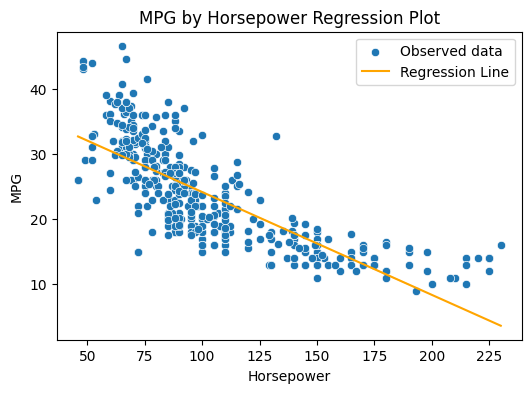

In [61]:
y_pred = results.predict()
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x='horsepower', y='mpg', data=df_auto, ax=ax, label='Observed data')
sns.lineplot(x='horsepower', y=y_pred, data=df_auto, ax=ax, color='orange', label='Regression Line')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.legend()
ax.set_title("MPG by Horsepower Regression Plot")
plt.show()

### c)

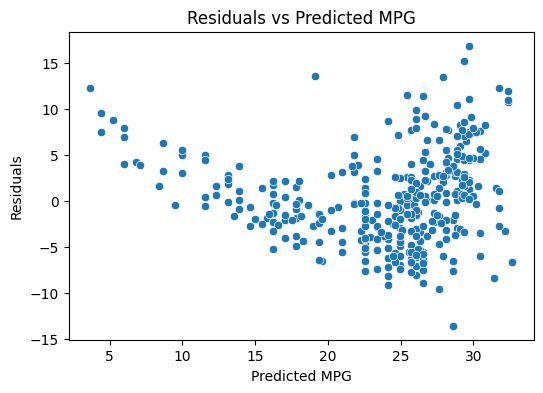

In [69]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=results.resid, data=df_auto, ax=ax)
ax.set_xlabel("Predicted MPG")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Predicted MPG")
plt.show()


The U-shape curve indicates that the relationship between the predictor and the response may not be linear. A transformation would be necessary to improve the model. Ideally, we would see not pattern in the residuals plot.